# Linear Regression 

Before learning what Linear regression is, let's understand what regression is.

### Regression

Regression analysis is a type of predictive modelling tehnique which finds the relationship between a dependent variable and an independent variable. It involves graphing a line over a set of data points that mostly fits the data. A regression shows the changes in the dependent variable on the Y-axis and independent variable(explanatory variable) on the X-axis.

Regression is maily used in following applications,

- Finding the strength of predictors 

- Analysis of Trends 

- Forecasting  
 

Where can linear regression be used ?

- Analyzing the effect of price changes 

- Assesment of risk in finance domain 

- Evaluating trends and sales estimates 
 
## Linear Regression using Least Squares Method,

Now let's see how linear regression works,

Suppose we have the dependent variable on Y-axis and the independent variable on the X-axis.

- If both independent and depenedent variables are increasing, the line we'll get will be a positive regression line.

- If both independent is increasing but depenedent variables is decresing, the line we'll get will be a negative regression line.

This regression line that we'll get is nothing but our linear regression line. It will have the equation,   \begin{align}
Y & = mX + c \\ \end{align}

Which is nothing but the equation of a line.


Now, let's say we plot few points on the graph, and we want to find out the best fit line. In order to do that we'll have to find out a regression line which will have minimum distance from every point on the graph, which is nothing but minimizing the error in estimated values and the predicted values.

In order to find out that regression line using least squares method we'll have to use following formulae,
 
 
 \begin{align} 
     Slope &= \frac{\sum \big(x_i - \bar{x})\big(y_i - \bar{y})}{\sum \big(x_i - \bar{x})^2}
 \end{align}
 
 \begin{align} 
 Intercept &= \bar{y} - m\bar{x}
 \end{align}


In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Reading data from csv
df = pd.read_csv('headbrain.csv')
print(df.shape)
df.head(5)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Now let's collect X and Y values for regression
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [4]:
# Now let's find mean values for X and Y and total number of values
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)

# Let's find the values of m(slope) and c(intercept)
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
m = numerator / denominator
c = y_mean - (m * x_mean)

print(f'Slope: {m}\nIntercept: {c}')

Slope: 0.26342933948939945
Intercept: 325.57342104944223


##### This implies our equation is,
\begin{align}
Y & = 0.26342933948939945X + 325.57342104944223 \\ \end{align} 
##### which is nothing but our linear regression model.

Now let's see it visually,

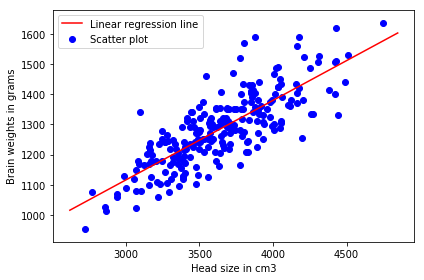

In [5]:
# Values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Get the line values for plotting
x = np.linspace(min_x, max_x, 100)
y = m*x + c

# Plot our line
plt.plot(x, y, color='r', label='Linear regression line')
plt.scatter(X, Y, c='b', label='Scatter plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weights in grams')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

Now let's see how good is our model,

In [6]:
def compute_r2(m, c, n):
    total_square_sum = 0 
    total_res_square_sum = 0
    for i in range(n):
        pred = c + X[i] * m 
        total_square_sum += (Y[i] - y_mean) ** 2
        total_res_square_sum += (Y[i] - pred) ** 2

    r_square = 1 - (total_res_square_sum / total_square_sum)
    return r_square

In [7]:
r2 = compute_r2(m, c, len(X))
print(f'R2: {r2}')

R2: 0.6393117199570003


This is pretty decent R2 score.
<hr>
Now let's try to implement linear regression in a more optimized way using gradient descent. 


## Linear Regression using Gradient Descent

In this approach, we define an error function which is basically the difference between sqaure of out predicted value and actual value of Y. Then we compute the partial derivatives with respect to slope and intercept. This derivative is called as gradient of our error function which guides us to find local minima, at which the error will be minimum.

Following is the error funtion,

<img src='https://miro.medium.com/max/615/1*AQKoBlrYPA6kjvW8XomKUQ.png' height=200 width=400>

We will find our partial derivatives w.r.t <strong>m (Slope)</strong> and <strong>c (Intercept)</strong> as follows,

<img src='https://miro.medium.com/max/596/1*3YJx2rdqMW5ccRJZFH9v6w.png' height=200 width=400>


In [8]:
m = 0
c = 0

L = 0.00000001  # The learning Rate is very low as there very less datapoints in our dataset
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (f'Slope: {m}\nIntercept: {c}')

Slope: 0.35212810742543593
Intercept: 0.0001607870701592473


##### This gives us the equation,
\begin{align}
Y & = 0.35212810742543593X + 0.0001607870701592473 \\ \end{align} 
##### which is nothing but our linear regression model.

Now let's see it visually,

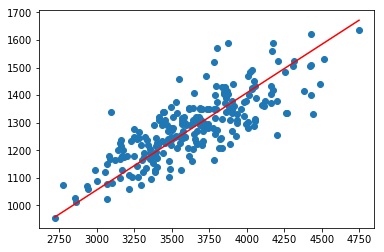

In [9]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [10]:
r2 = compute_r2(m, c, len(X))
print(f'R2: {r2}')

R2: 0.5661023311294194
